In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os


In [2]:
def plot_obs_by_layer(df,param_name,obs_name,exact_critical_param=None,exact_obs_func=None,ylim=None,xlim=None,max_layer=None):
    beta_min,beta_max=df[param_name].min(),df[param_name].max()
    nLayers=df['iLayer'].max()+1
    if max_layer is not None: nLayers=min(nLayers,max_layer)
    iLayers=np.arange(2,nLayers,2)
    betas=np.linspace(beta_min,beta_max,100)
    if xlim: betas=np.linspace(max(xlim[0],beta_min),min(xlim[1],beta_max),100)
    cm=plt.get_cmap('jet')
    plt.rcParams.update({'font.size': 14,'legend.fontsize':10})
    plt.figure(figsize=(6,4))
    plt.ylabel(obs_name)
    plt.xlabel(param_name)
    if exact_critical_param:
        plt.axvline(exact_critical_param,color='k',linestyle=':',label='Exact critical point')
    for iLayer in iLayers:
        df1=df[df['iLayer']==iLayer].sort_values(param_name)
        df1=df1[np.isfinite(df1[obs_name])]
        plt.plot(df1[param_name],df1[obs_name],'+',label='Layer %d'%iLayer,color=cm(iLayer/nLayers))
        # f1=PchipInterpolator(df1[param_name],df1[obs_name])
        f1=interp1d(df1[param_name],df1[obs_name],kind='linear',fill_value='extrapolate')
        plt.plot(betas,f1(betas),color=cm(iLayer/nLayers,alpha=.3))
    if callable(exact_obs_func):
        plt.plot(betas,exact_obs_func(betas),color='k',linestyle='--',label='Exact')
    elif isinstance(exact_obs_func,(float,int)):
        plt.axhline(exact_obs_func,color='k',linestyle='--',label='Exact')
    if ylim:plt.ylim(ylim)
    if xlim:plt.xlim(xlim)
    plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def load_df(filenames,obs_names,calc_binder=False):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    dfs=[]
    for filename in filenames:
        df=pd.read_csv(filename)
        dfs.append(df)
        print(filename)
    df=pd.concat(dfs)
    if calc_binder:
        for obs_name in obs_names:
            df[obs_name+'_binder']=df[obs_name+'_4']/df[obs_name+'_2']**2
    df['magnetizationXY']=(df['magnetizationX']**2+df['magnetizationY']**2)**.5
    df['magnetizationXYZ']=(df['magnetizationX']**2+df['magnetizationY']**2+df['magnetizationZ']**2)**.5
    return df

./data/aklt3d_X10_scan_params_line_observables/a1_1.1447005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1467005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1487005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1507005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1527005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1547005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1567005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1587005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1607005_a2_1.8257419_a3_4.4721360_observables.csv
./data/aklt3d_X10_scan_params_line_observables/a1_1.1627005_a2_1.8257419_a3_4.4721

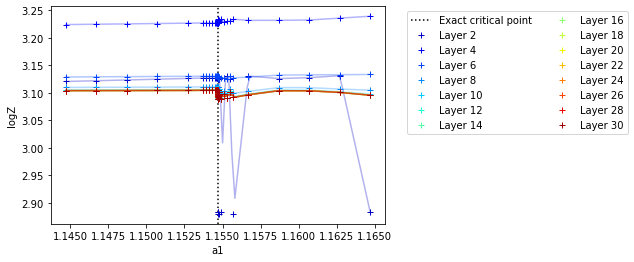

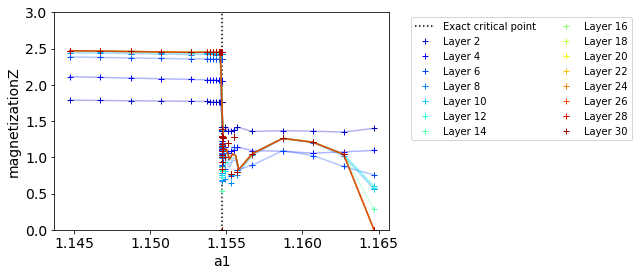

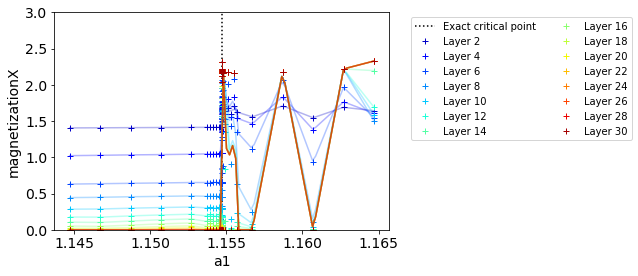

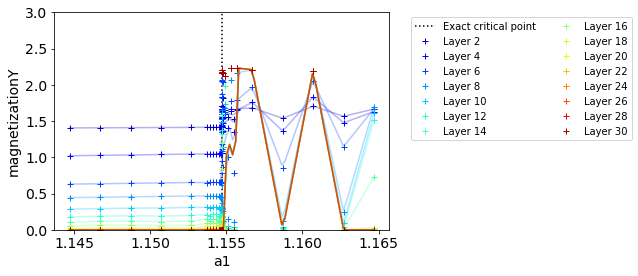

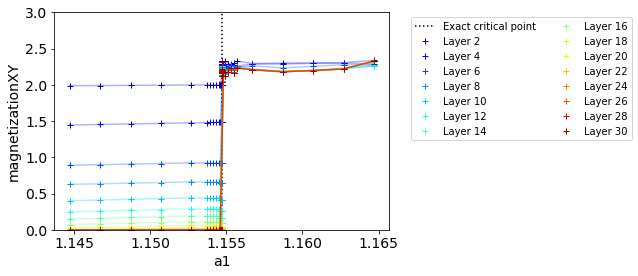

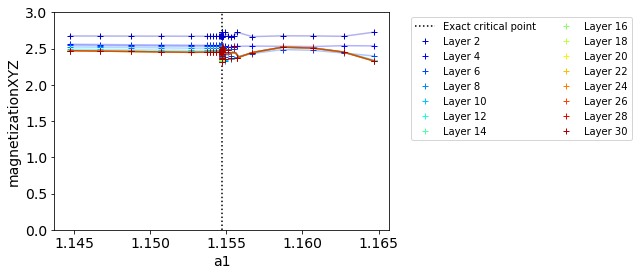

In [3]:
filenames,exact_model,=glob('./data/aklt3d_X10_scan_params_line_observables/*.csv'),None
obs_names=['magnetizationX','magnetizationY','magnetizationZ']

df=load_df(filenames,obs_names)

critical_params={'a1':np.sqrt(20/15),'a2':np.sqrt(20/6),'a3':np.sqrt(20/1)}
exact_critical_param=critical_params['a1']
plot_obs_by_layer(df,'a1','logZ',exact_critical_param)
plot_obs_by_layer(df,'a1','magnetizationZ',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a1','magnetizationX',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a1','magnetizationY',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a1','magnetizationXY',exact_critical_param,ylim=[0,3])
plot_obs_by_layer(df,'a1','magnetizationXYZ',exact_critical_param,ylim=[0,3])

In [4]:

filenames,exact_model,=sorted(glob('./data/ising3d_X10_scan_params_line_observables/*.csv')),ising3d_mc
obs_names=['magnetization']

df=load_df(filenames,obs_names)

max_layer=60
xlim=[.2,.23]
plot_obs_by_layer(df,'beta','logZ',exact_model.critical_beta,exact_model.logZ,max_layer=max_layer,xlim=xlim)
plot_obs_by_layer(df,'beta','magnetization',exact_model.critical_beta,exact_model.magnetization,max_layer=max_layer,ylim=[0,1],xlim=xlim)



./data/ising3d_X10_scan_params_line_observables/beta_0.1216544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.1416544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.1616544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.1816544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.2016544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.2216544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.2416544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.2616544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.2816544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.3016544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.3216544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta_0.2116544_observables.csv
./data/ising3d_X10_scan_params_line_observables/beta

KeyError: 'magnetizationX'

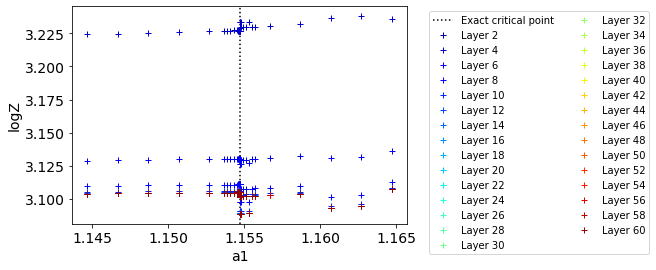

In [5]:

plot_obs_by_layer('a1','logZ',exact_critical_param)

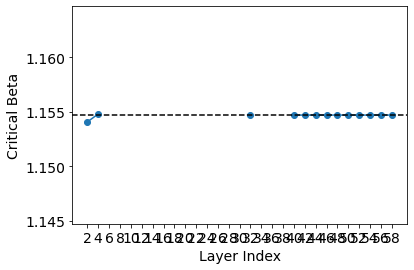

In [30]:
param_name='a1'
obs_name='magnetizationZ_binder'


# for layer i and i+1, find the crossing point of the binder
# plot i vs crossing point
# find the crossing point by spline fitting

from scipy.optimize import minimize,root
from scipy.interpolate import interp1d
from matplotlib.scale import SymmetricalLogScale

crossings=[]
beta_min,beta_max=df[param_name].min(),df[param_name].max()
betas_interp=np.linspace(beta_min,beta_max,1000)
exact_critical_param=exact_critical_param
nLayers=df['iLayer'].max()+1

for iLayer in range(2, nLayers-1, 2):
    df1 = df[df['iLayer'] == iLayer].sort_values(param_name)
    df2 = df[df['iLayer'] == iLayer+2].sort_values(param_name)

    f1 = PchipInterpolator(df1[param_name], df1[obs_name])
    f2 = PchipInterpolator(df2[param_name], df2[obs_name])
    
    result=root(lambda x: f1(x)-f2(x), (beta_min+beta_max)/2)
    crossing=result.x[0] if result.success else np.nan

    crossings.append(crossing)


plt.plot(range(2, nLayers-1, 2), crossings, 'o-')
plt.axhline(exact_critical_param, color='k', linestyle='--')
plt.ylim(beta_min,beta_max)
plt.xticks(range(2, nLayers-1, 2))
plt.xlabel('Layer Index')
plt.ylabel('Critical Beta')
plt.show()